<a href="https://colab.research.google.com/github/MDelibero/MDelibero/blob/main/Analisi_dati_istruzione_italia_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd

from shapely.geometry import Polygon
from shapely.geometry import Point
from shapely.geometry import MultiPolygon


import plotly.express as px
import base64
import os
from datetime import date
from plotly import graph_objs as go

# Uploading the Shapefiles

In [2]:
from google.colab import files
uploaded = files.upload()


### Shapefile qui --> https://www.istat.it/notizia/confini-delle-unita-amministrative-a-fini-statistici-al-1-gennaio-2018-2/
### Vanno caricati tutti i file della cartella REG_xxx

Saving Reg01012025_g_WGS84.dbf to Reg01012025_g_WGS84 (2).dbf
Saving Reg01012025_g_WGS84.prj to Reg01012025_g_WGS84 (2).prj
Saving Reg01012025_g_WGS84.shp to Reg01012025_g_WGS84 (2).shp
Saving Reg01012025_g_WGS84.shx to Reg01012025_g_WGS84 (2).shx


In [3]:
# Specifica il nome del file .shp senza l'estensione
file_name = "Reg01012025_g_WGS84"

# Carica il file shapefile in un GeoDataFrame
italy_shape = gpd.read_file(f"{file_name}.shp")

# New Enrollments Analysis

## Enrolments per region


In [4]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/fa028588-c0a3-4dc3-a73f-915162ed99b4/download/14a_immatricolatixresidenzasedecorsogruppo.csv"
df_immatricolati_geo = pd.read_csv(url, encoding='iso-8859-1', sep=';', dtype_backend='pyarrow')

regioni_da_escludere = ['REGIONE ESTERA', 'REGIONE NON FORNITA']

df_immatricolati_geo_plot_latest = df_immatricolati_geo[(df_immatricolati_geo['AnnoA'] == '2024/2025') & (~df_immatricolati_geo.RegioneRES.isin(regioni_da_escludere))]
df_immatricolati_geo_plot_latest_y_10 = df_immatricolati_geo[(df_immatricolati_geo['AnnoA'] == '2014/2015') & (~df_immatricolati_geo.RegioneRES.isin(regioni_da_escludere))]

rename_dict = {
    'ABRUZZO': 'Abruzzo',
    'BASILICATA': 'Basilicata',
    'CALABRIA': 'Calabria',
    'CAMPANIA': 'Campania',
    'EMILIA ROMAGNA': 'Emilia-Romagna',
    'FRIULI VENEZIA GIULIA': 'Friuli-Venezia Giulia',
    'LAZIO': 'Lazio',
    'LIGURIA': 'Liguria',
    'MARCHE': 'Marche',
    'MOLISE': 'Molise',
    'PIEMONTE': 'Piemonte',
    'PUGLIA': 'Puglia',
    'Provincia autonoma di Bolzano': 'Trentino-Alto Adige',
    'Provincia autonoma di TRENTO': 'Trentino-Alto Adige',
    'SARDEGNA': 'Sardegna',
    'SICILIA': 'Sicilia',
    'TOSCANA': 'Toscana',
    'UMBRIA': 'Umbria',
    'LOMBARDIA': 'Lombardia',
    'VALLE D\'AOSTA': 'Valle d\'Aosta',
    'VENETO': 'Veneto'
}

df_immatricolati_geo_plot_latest['DEN_REG'] = df_immatricolati_geo_plot_latest['RegioneRES'].replace(rename_dict)
df_immatricolati_geo_plot_latest_y_10['DEN_REG'] = df_immatricolati_geo_plot_latest_y_10['RegioneRES'].replace(rename_dict)



immatricolati_per_regione = df_immatricolati_geo_plot_latest.groupby(['DEN_REG']).agg(immatricolazioni=('Imm', 'sum')).reset_index()
immatricolati_per_regione_y_10 = df_immatricolati_geo_plot_latest_y_10.groupby(['DEN_REG']).agg(immatricolazioni=('Imm', 'sum')).reset_index()


den = immatricolati_per_regione.immatricolazioni.sum(axis=0)
immatricolati_per_regione['%immatricolazioni'] = (immatricolati_per_regione['immatricolazioni'] /  den)*100
immatricolati_per_regione['%immatricolazioni'] = immatricolati_per_regione['%immatricolazioni'].round().astype(int)

den_y_10 = immatricolati_per_regione_y_10.immatricolazioni.sum(axis=0)
immatricolati_per_regione_y_10['%immatricolazioni'] = (immatricolati_per_regione_y_10['immatricolazioni'] /  den)*100
immatricolati_per_regione_y_10['%immatricolazioni'] = immatricolati_per_regione_y_10['%immatricolazioni'].round().astype(int)





/tmp/ipython-input-4-4058631362.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immatricolati_geo_plot_latest['DEN_REG'] = df_immatricolati_geo_plot_latest['RegioneRES'].replace(rename_dict)
/tmp/ipython-input-4-4058631362.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_immatricolati_geo_plot_latest_y_10['DEN_REG'] = df_immatricolati_geo_plot_latest_y_10['RegioneRES'].replace(rename_dict)


In [5]:
geo_plot_ita_latest = italy_shape.merge(immatricolati_per_regione, how='left', on='DEN_REG')
geo_plot_ita_y_10 = italy_shape.merge(immatricolati_per_regione_y_10, how='left', on='DEN_REG')


/tmp/ipython-input-6-599371718.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


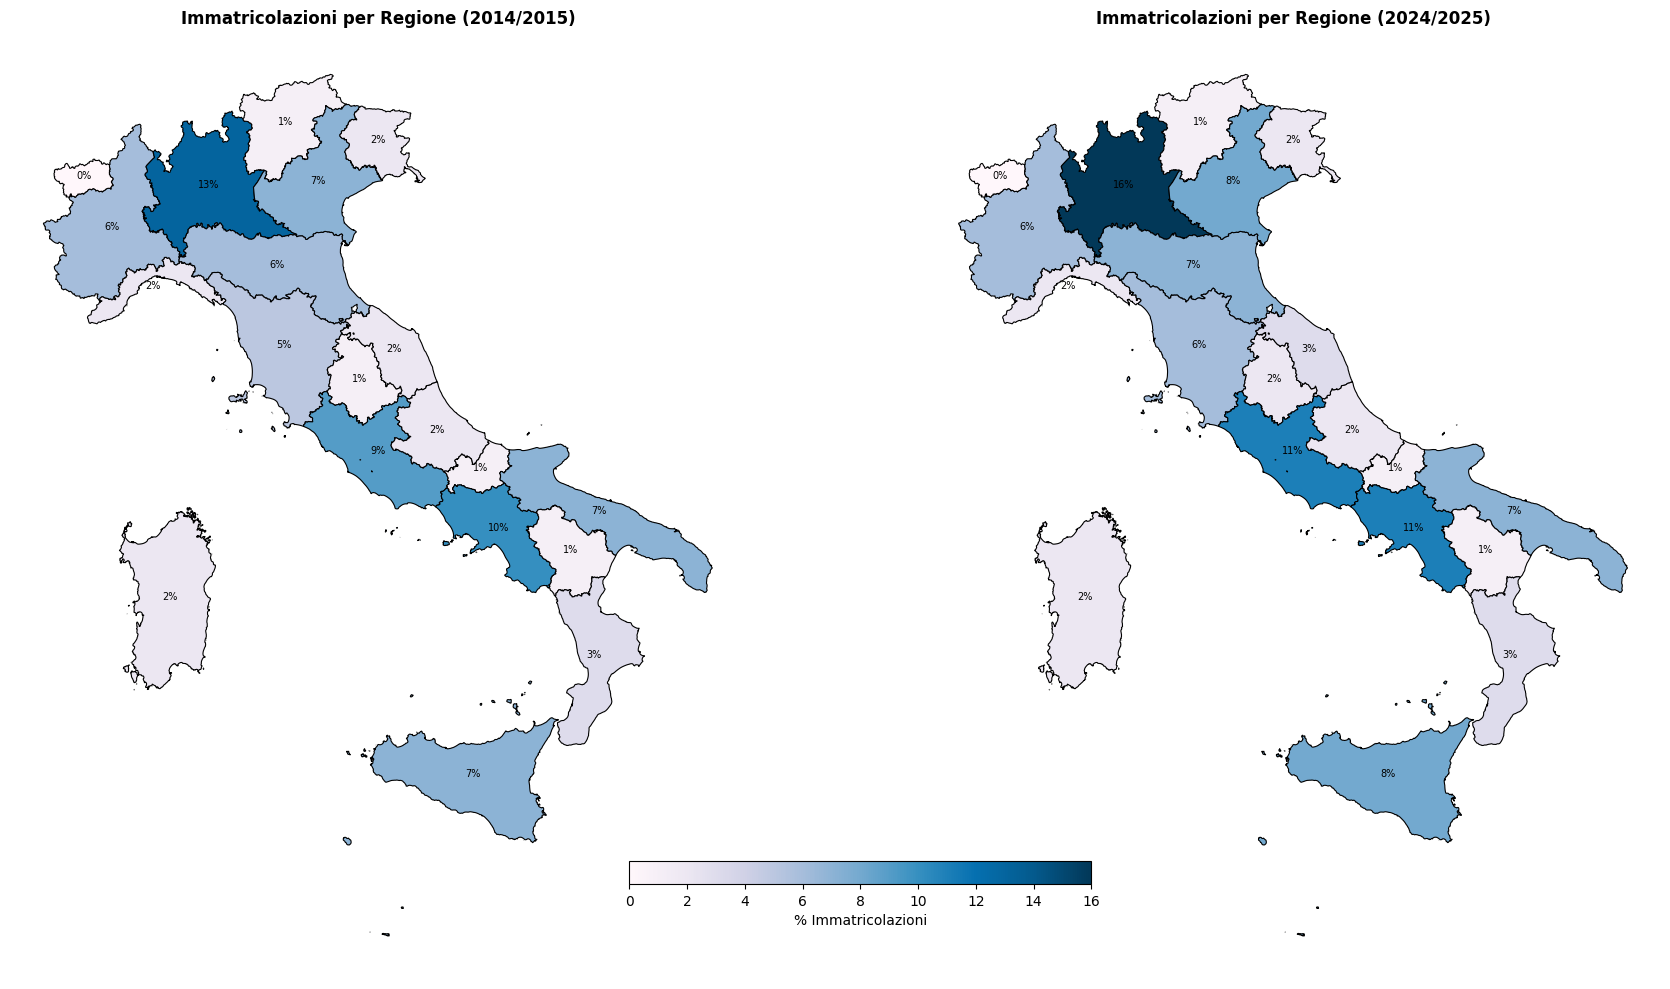

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10)) # Create a figure with 2 subplots side-by-side

# Determine the common color scale range
vmin = min(geo_plot_ita_y_10['%immatricolazioni'].min(), geo_plot_ita_latest['%immatricolazioni'].min())
vmax = max(geo_plot_ita_y_10['%immatricolazioni'].max(), geo_plot_ita_latest['%immatricolazioni'].max())

# Plot the first map (10 years ago)
geo_plot_ita_y_10.plot(ax=axes[0], column='%immatricolazioni', cmap='PuBu', legend=False, edgecolor='black', linewidth=0.8, vmin=vmin, vmax=vmax)
axes[0].set_title('Immatricolazioni per Regione (2014/2015)', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Add annotations for the first map
for idx, row in geo_plot_ita_y_10.iterrows():
    value = row['%immatricolazioni']
    if not pd.isna(value): # Check if value is not NaN
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        axes[0].annotate(f"{int(value)}%", xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=7, color='black', ha='center')


# Plot the second map (latest)
geo_plot_ita_latest.plot(ax=axes[1], column='%immatricolazioni', cmap='PuBu', legend=False, edgecolor='black', linewidth=0.8, vmin=vmin, vmax=vmax)
axes[1].set_title('Immatricolazioni per Regione (2024/2025)', fontsize=12, fontweight='bold')
axes[1].axis('off')

# Add annotations for the second map
for idx, row in geo_plot_ita_latest.iterrows():
    value = row['%immatricolazioni']
    if not pd.isna(value): # Check if value is not NaN
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        axes[1].annotate(f"{int(value)}%", xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=7, color='black', ha='center')


# Add a colorbar using the collection from the first axes
if axes[0].collections: # Check if there are collections in the first axes
    mappable = axes[0].collections[0]
    fig.colorbar(mappable, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.03, pad=0.05, label='% Immatricolazioni')


plt.tight_layout()
plt.show()

## Enrolments trends

In [7]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/c39e6e60-d92e-46f2-bfaa-f865d3fb1771/download/01_immatricolatixanno.csv"

df_immatricolazioni_totali = pd.read_csv(url, sep=';')

df_immatricolazioni_totali['anno'] = df_immatricolazioni_totali['AnnoA'].apply(lambda x: x[-2:])
df_immatricolazioni_totali['immatricolazioni_totali'] = pd.to_numeric(df_immatricolazioni_totali['Imm'].astype(str).str[:3])
df_immatricolazioni_totali['immatricolazioni_maschi'] = pd.to_numeric(df_immatricolazioni_totali['Imm_M'].astype(str).str[:3])
df_immatricolazioni_totali['immatricolazioni_femmine'] = pd.to_numeric(df_immatricolazioni_totali['Imm_F'].astype(str).str[:3])
df_immatricolazioni_totali = df_immatricolazioni_totali[df_immatricolazioni_totali['anno']!='99']
df_immatricolazioni_totali = df_immatricolazioni_totali.sort_values('anno')


import plotly.express as px
fig = px.line(df_immatricolazioni_totali, x="AnnoA", y=["immatricolazioni_totali"],
              title = 'New Student Enrolments by Academic Year (k) - ITA',
              template='plotly_white')

# Aggiunta di una linea rossa tratteggiata per l'anno accademico '2001/2002'
fig.add_shape(
    dict(
        type="line",
        x0='2000/2001', x1='2000/2001',
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="red", width=2, dash="dash")
    )
)

# Aggiunta di un'etichetta per la linea del 2001/2002
fig.add_annotation(
    dict(
        x='2000/2001',
        y=0,  # Posiziona l'etichetta sotto il grafico
        xref="x",
        yref="paper",
        xshift=-10,
        showarrow=False,
        text="Introduction of the 3+2 degree structure",
        textangle=-90,  # Rotazione del testo a 90 gradi
        font=dict(color="red", size=12),
        align="center"
    )
)

# Aggiunta di una linea rossa tratteggiata per l'anno accademico '2001/2002'
fig.add_shape(
    dict(
        type="line",
        x0='2003/2004', x1='2003/2004',
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="red", width=2, dash="dash")
    )
)

# Aggiunta di un'etichetta per la linea del 2001/2002
fig.add_annotation(
    dict(
        x='2003/2004',
        y=0,  # Posiziona l'etichetta sotto il grafico
        xref="x",
        yref="paper",
        xshift=-10,
        showarrow=False,
        text="Moratti Reform",
        textangle=-90,  # Rotazione del testo a 90 gradi
        font=dict(color="red", size=12),
        align="center"
    )
)

# Aggiunta di una linea rossa tratteggiata per l'anno accademico '2001/2002'
fig.add_shape(
    dict(
        type="line",
        x0='2009/2010', x1='2009/2010',
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="red", width=2, dash="dash")
    )
)

# Aggiunta di un'etichetta per la linea del 2001/2002
fig.add_annotation(
    dict(
        x='2009/2010',
        y=0,  # Posiziona l'etichetta sotto il grafico
        xref="x",
        yref="paper",
        xshift=-10,
        showarrow=False,
        text="Gelmini Reform",
        textangle=-90,  # Rotazione del testo a 90 gradi
        font=dict(color="red", size=12),
        align="center"
    )
)

# Aggiunta di una seconda linea rossa tratteggiata per l'anno accademico '2019/2020'
fig.add_shape(
    dict(
        type="line",
        x0='2019/2020', x1='2019/2020',
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="Grey", width=2, dash="dash")
    )
)

# Aggiunta di un'etichetta per la linea del 2019/2020
fig.add_annotation(
    dict(
        x='2019/2020',
        y=0,  # Posiziona l'etichetta sotto il grafico
        xref="x",
        yref="paper",
        xshift=-10,
        showarrow=False,
        text="COVID-19",
        textangle=-90,  # Rotazione del testo a 90 gradi
        font=dict(color="Grey", size=12),
        align="center"
    )
)

# Aggiunta di una seconda linea rossa tratteggiata per l'anno accademico '2019/2020'
fig.add_shape(
    dict(
        type="line",
        x0='2007/2008', x1='2007/2008',
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="Grey", width=2, dash="dash")
    )
)

# Aggiunta di un'etichetta per la linea del 2019/2020
fig.add_annotation(
    dict(
        x='2007/2008',
        y=0,  # Posiziona l'etichetta sotto il grafico
        xref="x",
        yref="paper",
        xshift=-10,
        showarrow=False,
        text="Economic recession 2008",
        textangle=-90,  # Rotazione del testo a 90 gradi
        font=dict(color="Grey", size=12),
        align="center"
    )
)

# Aggiunta di una seconda linea rossa tratteggiata per l'anno accademico '2016/2017'
fig.add_shape(
    dict(
        type="line",
        x0='2016/2017', x1='2016/2017',
        y0=0, y1=1,
        xref="x", yref="paper",
        line=dict(color="Red", width=2, dash="dash")
    )
)

# Aggiunta di un'etichetta per la linea del 2019/2020
fig.add_annotation(
    dict(
        x='2016/2017',
        y=0,  # Posiziona l'etichetta sotto il grafico
        xref="x",
        yref="paper",
        xshift=-10,
        showarrow=False,
        text="No-Tax Area",
        textangle=-90,  # Rotazione del testo a 90 gradi
        font=dict(color="Red", size=12),
        align="center"
    )
)



# fig.update_layout(showlegend=False, yaxis_title="Number of Uni enrollments in k", xaxis_title = 'Academic Year')
fig.update_layout(
    showlegend=False,
    title=dict(
        text='New Student Enrolments by Academic Year (k) - ITA',
        font=dict(size=20, family='Arial', color='black', weight='bold')  # weight supportato da Plotly
    ),
    xaxis=dict(
        title=dict(
            text='Academic Year',
            font=dict(size=14, family='Arial', color='black', weight='bold')
        )
    ),
    yaxis=dict(
        title=dict(
            text='Number of Uni enrollments in k',
            font=dict(size=14, family='Arial', color='black', weight='bold')
        )
    )
)

fig.show()

# plt.plot(df_immatricolazioni_totali['anno'], df_immatricolazioni_totali['immatricolazioni_totali'], label='Immatricolazioni Tot.')
# plt.xlabel('Anno accademico')
# plt.ylabel('#Immatricolazioni in K')

## Enrolments by fileds of study

In [8]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/81536e13-c15d-4be4-8a12-c74367233bc0/download/03_immatricolatixgruppo.csv"

df_immatricolazioni_per_gruppo = pd.read_csv(url, sep=';')

df_immatricolazioni_per_gruppo['anno'] = df_immatricolazioni_per_gruppo['AnnoA'].apply(lambda x: x[-2:])

def assegna_gruppo(row):
    if 'Arte e Design' in row['Nome Gruppo Disciplinare']:
        return "Architettura / Arti"
    elif 'Architettura e Ingegneria civile' in row['Nome Gruppo Disciplinare']:
        return "Architettura / Arti"
    elif 'Letterario-Umanistico' in row['Nome Gruppo Disciplinare']:
        return "Lingue / Letteratura"
    elif 'Linguistico' in row['Nome Gruppo Disciplinare']:
        return "Lingue / Letteratura"
    elif 'Psicologico' in row['Nome Gruppo Disciplinare']:
        return "Medico-Sanitario e Farmaceutico"
    else:
        return row['Nome Gruppo Disciplinare']


df_immatricolazioni_per_gruppo['gruppo_disciplinare_adj'] = df_immatricolazioni_per_gruppo.apply(assegna_gruppo, axis=1)

from slugify import slugify
df_immatricolazioni_per_gruppo['gruppo_disciplinare_adj'] = df_immatricolazioni_per_gruppo['gruppo_disciplinare_adj'].apply(lambda x: slugify(x))

recap = df_immatricolazioni_per_gruppo.groupby(['anno','gruppo_disciplinare_adj']).agg(immatricolazioni=('Imm', 'sum')).reset_index()


recap

,anno,gruppo_disciplinare_adj,immatricolazioni
0,00,agrario-forestale-e-veterinario,6256
1,00,architettura-arti,25077
2,00,economico,40974
3,00,educazione-e-formazione,15545
4,00,giuridico,38917
...,...,...,...
319,99,lingue-letteratura,35346
320,99,medico-sanitario-e-farmaceutico,34949
321,99,politico-sociale-e-comunicazione,26086
322,99,scientifico,21029


In [9]:
# prompt: a partire dal df "recap"
# fammi calcolami la crescita indicizzata a partire dall'anno 00 per gruppo disciplinare.
# plotta con ploty express un graffico con asse orizzontale = anno (a partire dal 00)
# asse verticale = crescita indicizzata
# hue = gruppo disciplinare adj

import pandas as pd
import plotly.express as px

# Calculate the base value for each group (year 00)
recap = recap[recap['anno'] != '99'].copy() # Add .copy() to avoid SettingWithCopyWarning
base_values = recap[recap['anno'] == '00'].set_index('gruppo_disciplinare_adj')['immatricolazioni']

# Calculate the indexed growth
recap['crescita_indicizzata'] = recap.apply(
    lambda row: (row['immatricolazioni'] / base_values[row['gruppo_disciplinare_adj']]) * 100 if row['gruppo_disciplinare_adj'] in base_values and base_values[row['gruppo_disciplinare_adj']] != 0 else 0,
    axis=1
)

# Ensure 'anno' is treated as a categorical variable for correct plotting order
recap['anno_cat'] = pd.Categorical(recap['anno'], categories=sorted(recap['anno'].unique()), ordered=True)

# Define custom colors
color_map = {group: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] for i, group in enumerate(recap['gruppo_disciplinare_adj'].unique())}
color_map['ingegneria-industriale-e-dell-informazione'] = 'darkgrey'


# Plot using Plotly Express
fig = px.line(recap,
              x="anno_cat",
              y="crescita_indicizzata",
              color="gruppo_disciplinare_adj",
              title="<b>Indexed Enrollment Growth by Disciplinary Group (Base Year '00)<b>",
              labels={"anno_cat": "Anno (a partire dal 00)", "crescita_indicizzata": "Crescita Indicizzata (Anno 00 = 100)"},
              template='plotly_white',
              color_discrete_map=color_map) # Use the custom color map


fig.update_layout(
    xaxis_title="<b>Year</b>",
    yaxis_title="<b>Indexed Growth (Year '00 = 100)</b>",
    legend_title="<b>Field of Study</b>",
    shapes=[
        dict(
            type='line',
            yref='y',
            y0=100,  # Set y-coordinate to 100
            y1=100,  # Set y-coordinate to 100
            xref='paper',
            x0=0,
            x1=1,
            line=dict(
                color='grey',  # Set color to grey
                width=1,
                dash='dash'  # Set dash style
            ),
        )
    ]
)

fig.show()

## High school graduates migration

In [10]:
url = "http://dati.ustat.miur.it/dataset/14aeb712-4665-4311-9e90-3e13639e8f50/resource/ebf47017-1033-4481-aa02-7a7137be6923/download/14b_immatricolatixsedescuolasecondariasedecorso.csv"

df_immatricolati_per_provincia_diploma = pd.read_csv(url, sep=';')

df_immatricolati_per_provincia_diploma.head()

,AnnoA,IstatProvD,ProvinciaSedeDiploma,CODIstatProvCorso,ProvinciaSedeCorso,SESSO,Imm
0,2016/2017,20,MANTOVA,28,PADOVA,M,22
1,2023/2024,81,TRAPANI,32,TRIESTE,M,2
2,2014/2015,58,ROMA,92,CAGLIARI,M,2
3,2013/2014,62,BENEVENTO,67,TERAMO,M,1
4,2022/2023,14,SONDRIO,69,CHIETI,F,1


In [11]:
import zipfile
import urllib.request

zip_url = "https://www.istat.it/storage/codici-unita-amministrative/Elenco-codici-statistici-e-denominazioni-delle-unit%C3%A0-territoriali.zip"


zip_file = "Elenco-codici-statistici-e-denominazioni-delle-unita-territoriali.zip"
urllib.request.urlretrieve(zip_url, zip_file)

# Estrai il file Excel dal file ZIP
excel_file = "Elenco-codici-statistici-e-denominazioni-delle-unita-territoriali/Codici-statistici-e-denominazioni-al-17_01_2023.xls"
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    file_list = zip_ref.namelist()
    for file_name in file_list:
        if file_name.endswith(".xls") or file_name.endswith(".xlsx"):
            excel_file = file_name
            break

    zip_ref.extract(excel_file)

# Carica il file Excel come pandas DataFrame
df_istat = pd.read_excel(excel_file)



df_istat = df_istat.rename(columns={'Denominazione dell\'Unità territoriale sovracomunale \n(valida a fini statistici)': 'Provincia'})
df_istat = df_istat.rename(columns={'Denominazione Regione': 'Regione'})

# Stampa il DataFrame con la colonna rinominata
df_prov_reg = df_istat[['Regione','Provincia','Ripartizione geografica']].drop_duplicates()

def correzione_regione(row):
    if 'Nord' in row['Ripartizione geografica']:
        return "Nord"
    elif 'Isole'in row['Ripartizione geografica']:
        return "Sud"
    else:
        return row['Ripartizione geografica']


df_prov_reg['area'] = df_prov_reg.apply(correzione_regione, axis=1)

df_prov_reg['area'].unique()

array(['Nord', 'Centro', 'Sud'], dtype=object)

In [12]:
df_immatricolati_per_provincia_diploma['ProvinciaSedeDiploma'] = df_immatricolati_per_provincia_diploma['ProvinciaSedeDiploma'].apply(lambda x: slugify(x))
df_immatricolati_per_provincia_diploma['ProvinciaSedeCorso'] = df_immatricolati_per_provincia_diploma['ProvinciaSedeCorso'].apply(lambda x: slugify(x)) # Corrected column name
df_prov_reg['Provincia'] = df_prov_reg['Provincia'].apply(lambda x: slugify(x))

df_matr = df_immatricolati_per_provincia_diploma.merge(df_prov_reg, how='left', left_on='ProvinciaSedeDiploma' ,right_on='Provincia')
df_matr.rename(columns={"Provincia": "Provincia Diploma", "Regione": "Regione Diploma", "area": "Area Diploma"}, inplace=True)

df_matr_fin = df_matr.merge(df_prov_reg, how='left', left_on='ProvinciaSedeCorso' ,right_on='Provincia') # Corrected column name
df_matr_fin.rename(columns={"Provincia": "Provincia Corso", "Regione": "Regione Corso", "area": "Area Corso"}, inplace=True)

df_matr_fin.head()

,AnnoA,IstatProvD,ProvinciaSedeDiploma,CODIstatProvCorso,ProvinciaSedeCorso,SESSO,Imm,Regione Diploma,Provincia Diploma,Ripartizione geografica_x,Area Diploma,Regione Corso,Provincia Corso,Ripartizione geografica_y,Area Corso
0,2016/2017,20,mantova,28,padova,M,22,Lombardia,mantova,Nord-ovest,Nord,Veneto,padova,Nord-est,Nord
1,2023/2024,81,trapani,32,trieste,M,2,Sicilia,trapani,Isole,Sud,Friuli-Venezia Giulia,trieste,Nord-est,Nord
2,2014/2015,58,roma,92,cagliari,M,2,Lazio,roma,Centro,Centro,Sardegna,cagliari,Isole,Sud
3,2013/2014,62,benevento,67,teramo,M,1,Campania,benevento,Sud,Sud,Abruzzo,teramo,Sud,Sud
4,2022/2023,14,sondrio,69,chieti,F,1,Lombardia,sondrio,Nord-ovest,Nord,Abruzzo,chieti,Sud,Sud


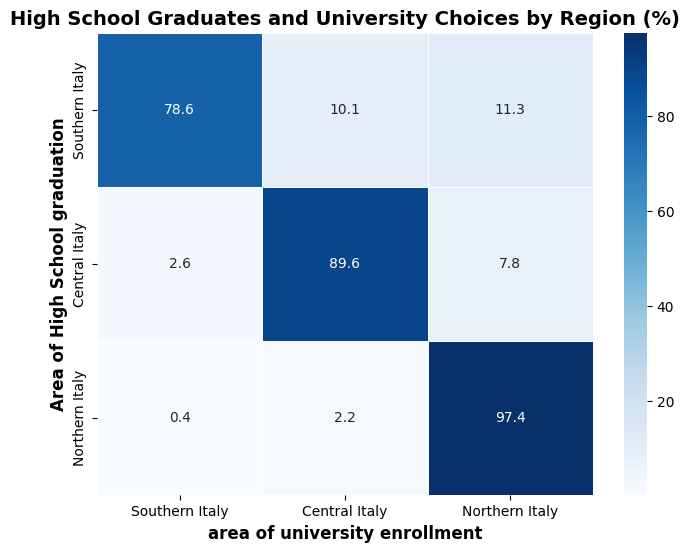

In [13]:
plot_migrazione = pd.pivot_table(df_matr_fin, values='Imm', index='Area Diploma', columns='Area Corso', aggfunc='sum')



# Calculate percentages: divide each row by the sum of the row
plot_migrazione_percent = plot_migrazione.apply(lambda x: x / x.sum(), axis=1) * 100

# Rename columns
plot_migrazione_percent.columns.name = 'Area Uni'

# Define the desired order for columns
desired_column_order = ['Sud', 'Centro', 'Nord']

# Reindex the DataFrame with the desired column order
plot_migrazione_percent = plot_migrazione_percent[desired_column_order]

# Define the desired order for rows
desired_row_order = ['Sud', 'Centro', 'Nord']

# Reindex the DataFrame with the desired row order

plot_migrazione_percent = plot_migrazione_percent.reindex(desired_row_order)

# Rename index and columns for plotting
rename_dict_areas = {'Sud': 'Southern Italy', 'Centro': 'Central Italy', 'Nord': 'Northern Italy'}
plot_migrazione_percent = plot_migrazione_percent.rename(index=rename_dict_areas, columns=rename_dict_areas)


# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(plot_migrazione_percent, annot=True, fmt=".1f", cmap="Blues", linewidths=.5)

plt.title('High School Graduates and University Choices by Region (%)', fontsize=14, fontweight='bold')
plt.xlabel('area of university enrollment', fontsize=12, fontweight='bold')
plt.ylabel('Area of High School graduation', fontsize=12, fontweight='bold')

plt.show()

/tmp/ipython-input-14-2294583887.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-14-2294583887.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-14-2294583887.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



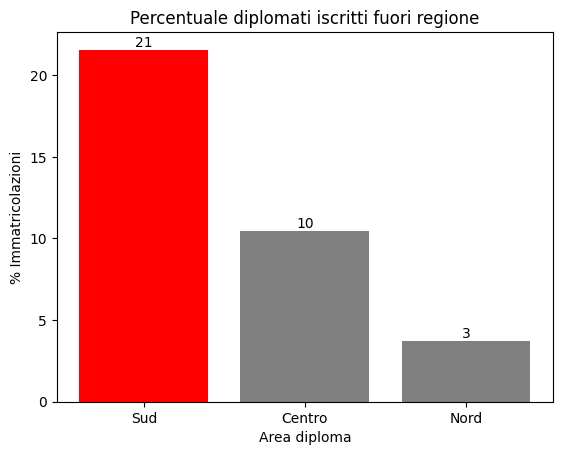

In [14]:
# df_matr__22_23 = df_matr_fin[df_matr_fin['AnnoA']=='2022/2023']

df_matr_fin['immatricolati_fuori_area'] = np.where((df_matr_fin['Area Diploma']== df_matr_fin['Area Corso']), 0,1)

recap_emigranti = df_matr_fin.groupby(['Area Diploma', 'immatricolati_fuori_area']).agg(immatricolazioni=('Imm', 'sum')).reset_index()

recap_emigranti_looped = pd.DataFrame()


for area in recap_emigranti['Area Diploma'].unique():
    df_filtered = recap_emigranti[recap_emigranti['Area Diploma'] == area]
    den = df_filtered.immatricolazioni.sum(axis=0)
    df_filtered['%immatricolazioni'] = (df_filtered['immatricolazioni'] /  den)*100
    recap_emigranti_looped = pd.concat([recap_emigranti_looped, df_filtered])


recap_emigranti_looped = recap_emigranti_looped[recap_emigranti_looped['immatricolati_fuori_area']==1]

recap_emigranti_looped

# Definisci l'ordine desiderato
custom_order = ['Sud', 'Centro', 'Nord']

# Ordina il DataFrame in base all'ordine desiderato
recap_emigranti_looped = recap_emigranti_looped.set_index('Area Diploma').loc[custom_order].reset_index()

# Crea il grafico
plt.bar(recap_emigranti_looped['Area Diploma'], recap_emigranti_looped['%immatricolazioni'], color=['red', 'gray', 'gray'])

# Aggiungi etichette e titolo
plt.xlabel('Area diploma')
plt.ylabel('% Immatricolazioni')
plt.title('Percentuale diplomati iscritti fuori regione')

# Aggiungi etichette dei valori sulle barre
for i, value in enumerate(recap_emigranti_looped['%immatricolazioni']):
    plt.text(i, value, int(value), ha='center', va='bottom')




# Mostra il grafico
plt.show()

## Abandonment rate

In [25]:
###Tasso di abbandono

url = "https://dati-ustat.mur.gov.it/dataset/05a4bcb1-37f1-4686-bb47-e811c333293d/resource/770cff80-d35d-4476-b273-615666836a99/download/tassoabbandono.csv"

# Read the CSV, specifying the decimal separator
df_tasso_di_abbandono = pd.read_csv(url, sep=';', decimal=',')
df_tasso_di_abbandono['TA_TOT'] = df_tasso_di_abbandono['TA_TOT'].astype(float)
df_tasso_di_abbandono

,AnnoA,TA_M,TA_F,TA_TOT,Note
0,2022/2023,7.3,7.0,7.1,dati provvisori
1,2021/2022,8.3,7.9,8.1,NaN
2,2020/2021,7.3,7.2,7.2,NaN
3,2019/2020,6.2,6.1,6.1,NaN
4,2018/2019,6.5,6.5,6.5,NaN
5,2017/2018,6.4,6.2,6.3,NaN
6,2016/2017,6.2,6.0,6.1,NaN
7,2015/2016,6.1,5.9,6.0,NaN
8,2014/2015,6.1,5.7,5.9,NaN
9,2013/2014,6.6,6.7,6.6,NaN


In [26]:
# prompt: Using dataframe df_tasso_di_abbandono: fai un grafico che mostra il tasso di abbandono totale "TA_TOT" per AnnoA usa plotyexp. il grafico deve partire dall'annoa 2011 e andare avanti. metti in grassetto le label degli assi ed il titolo.
# La label asse orizonntale diventa Academic year. Lable asset vertical diventa abandonment rate. Il titolo diventa abandonment rate by academic year.
# di nuovo ordina dal 2011 a salire
# ruota leggermente le lable sull'asse orizzontale

import plotly.express as px

# Extract the starting year as an integer
df_tasso_di_abbandono['AnnoInizio'] = df_tasso_di_abbandono['AnnoA'].str.split('/').str[0].astype(int)

# Filter data starting from AnnoInizio 2011
df_filtered = df_tasso_di_abbandono[df_tasso_di_abbandono['AnnoInizio'] >= 2011].copy()

# Sort the data by 'AnnoInizio' to ensure correct order on the x-axis
df_filtered = df_filtered.sort_values(by='AnnoInizio')

# Create the line plot using Plotly Express
fig = px.line(
    df_filtered,
    x='AnnoA',
    y='TA_TOT',
    title='<b>First-year dropout rate</b>' # Set plot title in bold
)

# Update x-axis title and style
fig.update_layout(
    xaxis_title='<b>Academic year</b>', # Set x-axis title in bold
    yaxis_title='<b>Dropout rate</b>', # Set y-axis title in bold
    xaxis=dict(
        tickangle=-45 # Rotate x-axis labels
    )
)

# Show the plot
fig.show()

## Number of graduates

In [27]:
## Numero laureati

url = "https://dati-ustat.mur.gov.it/dataset/ca0b9831-c9ef-49d4-b792-6bd963e4d837/resource/43df861d-7345-481a-9803-2eb236aa022e/download/01_laureatixanno.csv"

# Read the CSV
df_laureati = pd.read_csv(url, sep=';')

# Clean the 'Lau' column for years 2001 to 2008: remove '.' and convert to numeric
for year in range(2001, 2009):
    df_laureati.loc[df_laureati['AnnoS'] == year, 'Lau'] = df_laureati.loc[df_laureati['AnnoS'] == year, 'Lau'].astype(str).str.replace('.', '', regex=False)

# Convert the entire 'Lau' column to numeric
df_laureati['Lau'] = pd.to_numeric(df_laureati['Lau'])

# Correct the value for the year 2009
df_laureati.loc[df_laureati['AnnoS'] == 2009, 'Lau'] = 292810


df_laureati



/tmp/ipython-input-27-770545042.py:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['171806']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,AnnoS,Lau_M,Lau_F,Lau,fonte dati,Note
0,2024,173877.000,237705.000,411582.0,Anagrafe Nazionale degli Studenti universitari...,dati provvisori
1,2023,167422.000,225997.000,393419.0,Anagrafe Nazionale degli Studenti universitari...,NaN
2,2022,157079.000,210412.000,367491.0,Anagrafe Nazionale degli Studenti universitari...,NaN
3,2021,160299.000,213650.000,373949.0,Anagrafe Nazionale degli Studenti universitari...,NaN
4,2020,153496.000,200515.000,354011.0,Anagrafe Nazionale degli Studenti universitari...,NaN
5,2019,149033.000,195066.000,344099.0,Anagrafe Nazionale degli Studenti universitari...,NaN
6,2018,141113.000,187151.000,328264.0,Anagrafe Nazionale degli Studenti universitari...,NaN
7,2017,134809.000,183674.000,318483.0,Anagrafe Nazionale degli Studenti universitari...,NaN
8,2016,131595.000,180589.000,312184.0,Anagrafe Nazionale degli Studenti universitari...,NaN
9,2015,127132.000,178051.000,305183.0,Anagrafe Nazionale degli Studenti universitari...,NaN


In [28]:
# Create the Plotly Express graph
fig = px.line(df_laureati, x='AnnoS', y='Lau',
              title='<b>Number of graduates per year</b>',
              labels={'AnnoS': '<b>Year</b>', 'Lau': '<b>Number of graduates (K)</b>'},
              template='plotly_white')

# Update x-axis to show more ticks
fig.update_layout(
    xaxis = dict(
        tickmode = 'auto',
        nticks = 20 # You can adjust this number to control the density of ticks
    )
)

# Show the graph
fig.show()